In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Advanced Analytics & Dashboard Design\Cleaned Data\gun-violence-cleaned.csv"
data = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
print(data.head())

   incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/4788

In [2]:
# Check for null values
print(data.isnull().sum())

# Inspect column names for renaming or corrections
print(data.columns)

# Check data types for potential reprocessing needs
print(data.info())

incident_id                    0
date                           0
state                          0
city_or_county                 0
address                        0
n_killed                       0
n_injured                      0
incident_url                   0
source_url                     0
incident_url_fields_missing    0
congressional_district         0
gun_stolen                     0
gun_type                       0
incident_characteristics       0
latitude                       0
longitude                      0
n_guns_involved                0
notes                          0
participant_age_group          0
participant_gender             0
participant_status             0
participant_type               0
sources                        0
state_house_district           0
state_senate_district          0
dtype: int64
Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_miss

In [3]:
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Confirm the conversion
print(data['date'].dtypes)

datetime64[ns]


In [4]:
# Rename columns to lowercase with underscores
data.columns = [col.lower().replace(' ', '_') for col in data.columns]

# Display the updated column names
print(data.columns)

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude', 'longitude',
       'n_guns_involved', 'notes', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'sources', 'state_house_district', 'state_senate_district'],
      dtype='object')


In [5]:
# Drop unnecessary columns
columns_to_drop = ['incident_id', 'incident_url', 'source_url', 'sources', 'notes']
data = data.drop(columns=columns_to_drop)

# Confirm the remaining columns
print(data.columns)

Index(['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude', 'longitude',
       'n_guns_involved', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district'],
      dtype='object')


In [6]:
print(data.head())

        date           state city_or_county  \
0 2013-01-01    Pennsylvania     Mckeesport   
1 2013-01-01      California      Hawthorne   
2 2013-01-01            Ohio         Lorain   
3 2013-01-05        Colorado         Aurora   
4 2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

   incident_url_fields_missing  congressional_district  \
0                        False                    14.0   
1                        False                    43.0   
2                        False                     9.0   
3                        False                     6.0   
4           

In [7]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Display the selected numerical columns
print(numerical_data.columns)

Index(['n_killed', 'n_injured', 'congressional_district', 'latitude',
       'longitude', 'n_guns_involved', 'state_house_district',
       'state_senate_district'],
      dtype='object')


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical data
scaled_data = scaler.fit_transform(numerical_data)

# Convert scaled data back into a DataFrame for easier interpretation
scaled_data = pd.DataFrame(scaled_data, columns=numerical_data.columns)

# Display the first few rows of the scaled data
print(scaled_data.head())# Import the KMeans class
from sklearn.cluster import KMeans

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


   n_killed  n_injured  congressional_district  latitude  longitude  \
0 -0.483519   4.803055                0.758893  0.547929   0.663814   
1  1.433006   3.433099                4.172395 -0.727227  -2.059077   
2  1.433006   3.433099                0.170358  0.765576   0.502339   
3  7.182580  -0.676767               -0.182763  0.410286  -1.101535   
4  3.349530   2.063144               -0.182763 -0.290469   0.656667   

   n_guns_involved  state_house_district  state_senate_district  
0        -0.060815             -1.081499              -1.229435  
1        -0.060815              0.358494               1.152727  
2         0.218279              0.221352              -0.303039  
3        -0.060815             -0.144361               0.689529  
4         0.218279              0.358494               0.623358  


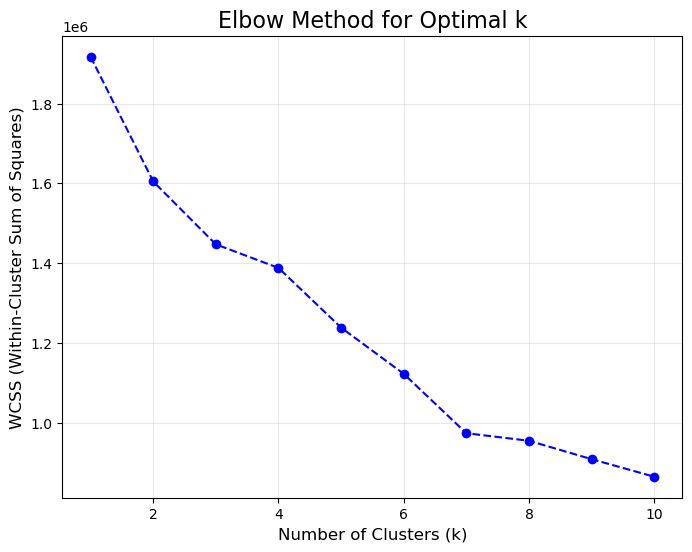

In [10]:
# Import the KMeans class
from sklearn.cluster import KMeans

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## **Choosing the Optimal Number of Clusters**

### **Observation of the Elbow Plot**:
1. The **elbow point** on the plot occurs at **k = 4**.
   - This is where the Within-Cluster Sum of Squares (WCSS) begins to decrease at a slower rate, indicating diminishing returns in improving cluster cohesion.
   - Beyond this point, adding more clusters does not significantly reduce the WCSS, which means additional clusters may overfit the data without providing meaningful insights.

### **Chosen Number of Clusters**:
- Based on the elbow plot, I will use **k = 4** for the k-means clustering algorithm.

### **Reasoning**:
1. **Balance Between Simplicity and Accuracy**:
   - Using 4 clusters provides enough granularity to capture meaningful patterns in the data while avoiding unnecessary complexity.
2. **Interpretability**:
   - With 4 clusters, the results are easier to interpret and analyze compared to higher numbers of clusters.

---

### **Next Steps**:
1. Apply k-means clustering using **k = 4**.
2. Analyze the characteristics of the clusters and interpret the results.


In [11]:
# Import KMeans from scikit-learn
from sklearn.cluster import KMeans

# Initialize k-means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the scaled data
kmeans.fit(scaled_data)

# Add the cluster labels to the dataset
scaled_data['cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(scaled_data.head())

# Check the number of points in each cluster
print(scaled_data['cluster'].value_counts())


   n_killed  n_injured  congressional_district  latitude  longitude  \
0 -0.483519   4.803055                0.758893  0.547929   0.663814   
1  1.433006   3.433099                4.172395 -0.727227  -2.059077   
2  1.433006   3.433099                0.170358  0.765576   0.502339   
3  7.182580  -0.676767               -0.182763  0.410286  -1.101535   
4  3.349530   2.063144               -0.182763 -0.290469   0.656667   

   n_guns_involved  state_house_district  state_senate_district  cluster  
0        -0.060815             -1.081499              -1.229435        0  
1        -0.060815              0.358494               1.152727        0  
2         0.218279              0.221352              -0.303039        0  
3        -0.060815             -0.144361               0.689529        3  
4         0.218279              0.358494               0.623358        0  
cluster
2    95592
1    75310
3    54881
0    13894
Name: count, dtype: int64


In [12]:
# Add the cluster labels to the original dataset
data['cluster'] = scaled_data['cluster']

# Display the first few rows to confirm the addition
print(data.head())

        date           state city_or_county  \
0 2013-01-01    Pennsylvania     Mckeesport   
1 2013-01-01      California      Hawthorne   
2 2013-01-01            Ohio         Lorain   
3 2013-01-05        Colorado         Aurora   
4 2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

   incident_url_fields_missing  congressional_district  \
0                        False                    14.0   
1                        False                    43.0   
2                        False                     9.0   
3                        False                     6.0   
4           

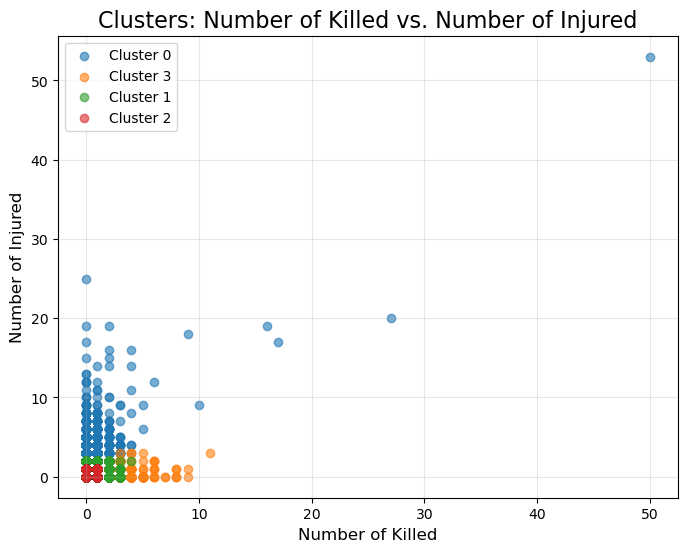

In [13]:
import matplotlib.pyplot as plt

# Scatterplot for n_killed vs. n_injured
plt.figure(figsize=(8, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(
        cluster_data['n_killed'],
        cluster_data['n_injured'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.title('Clusters: Number of Killed vs. Number of Injured', fontsize=16)
plt.xlabel('Number of Killed', fontsize=12)
plt.ylabel('Number of Injured', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


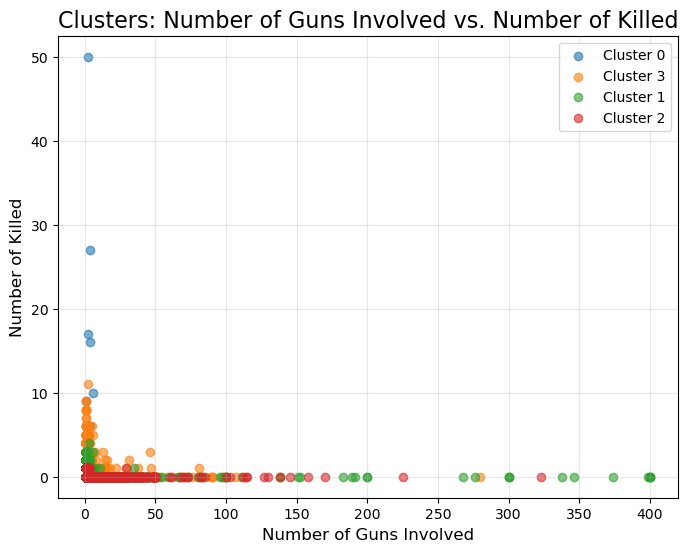

In [14]:
# Scatterplot for n_guns_involved vs. n_killed
plt.figure(figsize=(8, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(
        cluster_data['n_guns_involved'],
        cluster_data['n_killed'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.title('Clusters: Number of Guns Involved vs. Number of Killed', fontsize=16)
plt.xlabel('Number of Guns Involved', fontsize=12)
plt.ylabel('Number of Killed', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## **Discussion on Clusters**

### **Interpretation of Scatterplot 1: `n_killed` vs. `n_injured`**
1. **Cluster 0 (Blue)**:
   - Represents incidents with a high number of fatalities and injuries. 
   - These could potentially be mass shootings or large-scale events with significant casualties.

2. **Cluster 3 (Orange)**:
   - Captures incidents with moderate fatalities and injuries.
   - May represent smaller-scale events with noticeable, but not extreme, impacts.

3. **Cluster 1 (Green)**:
   - Primarily incidents with very few fatalities and injuries.
   - Likely includes a large number of minor or isolated incidents.

4. **Cluster 2 (Red)**:
   - Concentrated around incidents with no fatalities and minimal injuries.
   - Likely represents incidents where no lives were lost, and injuries were minor.

---

### **Interpretation of Scatterplot 2: `n_guns_involved` vs. `n_killed`**
1. **Cluster 0 (Blue)**:
   - Includes incidents with a high number of guns involved and fatalities.
   - Suggests events with access to a large number of firearms, potentially resulting in higher casualties.

2. **Cluster 3 (Orange)**:
   - Represents incidents with moderate firearm involvement and fatalities.
   - May include planned, smaller-scale shootings with some lethality.

3. **Cluster 1 (Green)**:
   - Concentrated around incidents with few guns and minimal fatalities.
   - Likely minor incidents or isolated events.

4. **Cluster 2 (Red)**:
   - Focused on incidents with very few guns and no fatalities.
   - Could represent accidents or less severe incidents.

---

### **Do the Clusters Make Sense?**
- The clusters appear logical as they group incidents based on severity (number of fatalities, injuries) and weapon involvement.
- The clustering aligns with intuitive patterns:
  - High-severity events form distinct groups (e.g., Cluster 0 for mass shootings).
  - Low-severity events form a separate, denser group (e.g., Cluster 2 for non-lethal incidents).

### **Insights Gained:**
1. The number of guns involved is not always proportional to the number of fatalities, suggesting other factors (e.g., location, intent, access to medical care) might play significant roles.
2. Most incidents fall into low-severity categories (Cluster 1 and Cluster 2), highlighting thaher exploration and refinement of the clustering process.


In [16]:
# Select only numerical columns for descriptive statistics
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Group data by cluster and calculate descriptive statistics for numerical columns
cluster_stats = data.groupby('cluster')[numerical_columns].mean()
cluster_std = data.groupby('cluster')[numerical_columns].std()

# Display the statistics
print("Cluster Means:")
print(cluster_stats)

print("\nCluster Standard Deviations:")
print(cluster_std)


Cluster Means:
         n_killed  n_injured  congressional_district   latitude   longitude  \
cluster                                                                       
0        0.153448   2.432057                6.501008  37.625472  -88.123686   
1        0.209335   0.379033               13.345704  34.857457  -88.002032   
2        0.015252   0.482070                4.136811  38.905231  -83.120458   
3        0.749130   0.181921                5.819355  38.998141 -101.864047   

         n_guns_involved  state_house_district  state_senate_district  
cluster                                                                
0               1.061897             40.724629              15.578667  
1               1.274147             88.493480              31.615682  
2               1.221389             25.400818               9.700425  
3               1.174140             26.283176              12.549334  

Cluster Standard Deviations:
         n_killed  n_injured  congressional_dist

## **Future Use of Cluster Results in an Analytics Pipeline**

The descriptive statistics calculated for each cluster provide valuable insights and can serve as the foundation for various advanced analyses and decision-making processes. Below are proposed uses of these results in future steps of the analytics pipeline:

---

### **1. Identifying Key Characteristics of Clusters**
- **Purpose**: Understand the unique attributes of each cluster.
- **Example**: Clusters with higher averages of `n_killed` and `n_injured` could represent mass shootings or highly lethal events.
- **Next Step**: Develop targeted strategies to prevent high-severity incidents based on these characteristics.

---

### **2. Feature Importance Analysis**
- **Purpose**: Pinpoint variables that significantly differentiate the clusters.
- **Example**: A higher mean for `n_guns_involved` in a specific cluster could indicate its impact on fatality rates.
- **Next Step**: Use machine learning techniques like decision trees or random forests to validate variable importance.

---

### **3. Policy Development and Intervention**
- **Purpose**: Inform policymakers about patterns and trends in gun violence.
- **Example**: Clusters with higher incidents in certain states or districts can guide resource allocation for intervention.
- **Next Step**: Design and implement targeted public safety policies based on these insights.

---

### **4. Anomaly Detection**
- **Purpose**: Identify outliers or unusual events in the dataset.
- **Example**: Incidents in high-severity clusters (e.g., Cluster 0) with extreme values for `n_killed` or `n_injured` may warrant further investigation.
- **Next Step**: Conduct detailed case studies on outliers to uncover root causes or unusual circumstances.

---

### **5. Predictive Modeling**
- **Purpose**: Train models to predict which cluster a new incident belongs to.
- **Example**: Use historical data to classify incidents and predict outcomes (e.g., likelihood of high-severity events).
- **Next Step**: Implement classification models like k-nearest neighbors (KNN) or logistic regression for incident prediction.

---

### **6. Tailoring Public Awareness Campaigns**
- **Purpose**: Customize public safety campaigns based on cluster profiles.
- **Example**: Focus on firearm safety education in regions corresponding to clusters with high firearm involvement.
- **Next Step**: Use demographic data (e.g., `participant_age_group`, `participant_gender`) to target specific communities effectively.

---

### **7. Evaluating the Impact of Policies**
- **Purpose**: Assess how interventions (e.g., gun control laws, public safety programs) influence cluster characteristics over time.
- **Example**: Track changes in cluster sizes and averages after implementing a new policy.
- **Next Step**: Perform time-series analysis to monitor trends and shifts in patterns.

---

### **8. Hypothesis Generation**
- **Purpose**: Develop hypotheses for further testing based on cluster attributes.
- **Example**: Hypothesize that incidents in Cluster 3 are driven by socioeconomic factors.
- **Next Step**: Integrate external data (e.g., poverty rates, education levels) to explore correlations and causal relationships.

---

### **Conclusion**
The descriptive statistics provide a roadmap for future analysis by enabling:
1. **Actionable insights** for policy and intervention.
2. **Predictive modeling** to anticipate outcomes.
3. **Continuous monitoring** of cluster evolution over time.

These results are instrumental in creating data-driven strategies to address gun violence effectively.
